In [1]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=540846;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=184083;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#164\164]8;;\
                             C:\Users\9509298u\Documents\GitHub\OC_Projects\ocp7-scoring-model-clou                
                             d.                                                                                    
                             To set a different path, run '%reload_kedro <project_root>'                           

[06/10/24 15:02:45] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=410935;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=106894;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=753070;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=25554;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/9509298u/Documents/GitHub/OC_Projects/ocp                           
                             7-scoring-model-cloud/mlruns'                                                         

[06/10/24 15:02:46] INFO     Kedro project ocp7_scoring_model_cloud                                 ]8;id=43983;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=428726;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=858670;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=668181;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=955271;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=141098;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt

import mlflow

In [3]:
train_df = catalog.load("full_df_train")
#test_df = catalog.load("full_df_test")

[06/10/24 15:02:47] INFO     Loading data from full_df_train (ParquetDataset)...                ]8;id=621615;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=673954;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py#483\483]8;;\

In [4]:
from src.ocp7_scoring_model_cloud.dashboard.dashboard_funcs import request_prediction

In [35]:
shap_values_response = request_prediction(train_df.head(1).drop(["TARGET", "SK_ID_CURR"], axis=1), model_url="http://127.0.0.1:8000/explain_local")

In [46]:
shap_values = shap.Explanation(
    values=np.array(shap_values_response['values']),
    base_values=np.array(shap_values_response['base_values']),
    data=np.array(shap_values_response['data']),
    feature_names=np.array(shap_values_response['feature_names'])
)

In [47]:
type(shap_values)

<class 'shap._explanation.Explanation'>

In [48]:
shap_values


.values =
array([[ 0.00000000e+00,  5.44646674e-02,  6.14468936e-04,
         0.00000000e+00,  0.00000000e+00,  4.29882068e-03,
        -1.51576771e-05, -8.07588862e-06,  0.00000000e+00,
         0.00000000e+00, -2.71383561e-03,  7.81613518e-03,
        -1.46914053e-05,  0.00000000e+00, -2.25675731e-03,
        -1.15203324e-04, -5.13064424e-05, -3.40759905e-05,
         6.68436683e-03,  0.00000000e+00,  0.00000000e+00,
         8.66050548e-02,  0.00000000e+00, -3.60115608e-02,
        -6.78059998e-02,  3.92471270e-02,  0.00000000e+00,
         0.00000000e+00,  4.01122245e-03, -1.06840408e-03,
        -7.20990391e-04,  0.00000000e+00,  0.00000000e+00,
        -2.44101898e-05, -1.94312780e-04,  0.00000000e+00,
         1.22963836e-03,  0.00000000e+00, -1.10530133e-04,
         3.30263021e-03, -9.37018134e-03, -9.18215290e-04,
        -1.01538888e-04,  0.00000000e+00,  9.83587276e-03,
        -1.28718300e-03,  0.00000000e+00, -1.57142705e-03,
         0.00000000e+00,  2.71014040e-02, -1.

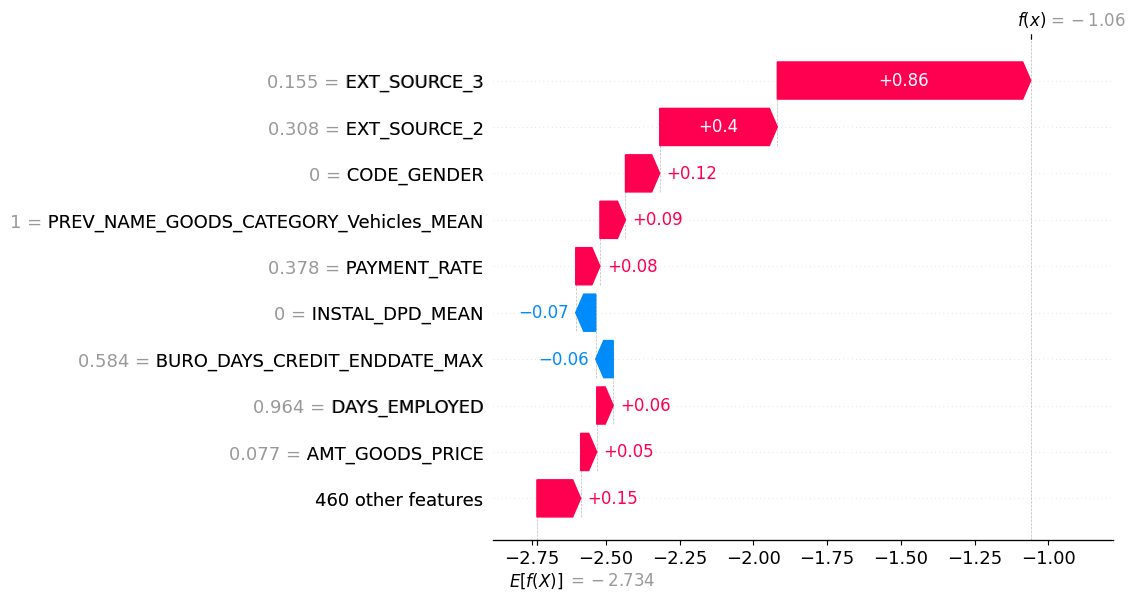

In [49]:
shap.waterfall_plot(shap_values[0])

In [18]:
model = mlflow.sklearn.load_model('../src/ocp7_scoring_model_cloud/Model_API/production_model')

In [19]:
explainer = shap.Explainer(model)

In [20]:
shap_values_local= explainer(train_df.head(1).drop(["TARGET", "SK_ID_CURR"], axis=1))

In [26]:
shap.Explanation(shap_values_local)


.values =
array([[ 0.00000000e+00,  5.44646674e-02,  6.14468936e-04,
         0.00000000e+00,  0.00000000e+00,  4.29882068e-03,
        -1.51576771e-05, -8.07588862e-06,  0.00000000e+00,
         0.00000000e+00, -2.71383561e-03,  7.81613518e-03,
        -1.46914053e-05,  0.00000000e+00, -2.25675731e-03,
        -1.15203324e-04, -5.13064424e-05, -3.40759905e-05,
         6.68436683e-03,  0.00000000e+00,  0.00000000e+00,
         8.66050548e-02,  0.00000000e+00, -3.60115608e-02,
        -6.78059998e-02,  3.92471270e-02,  0.00000000e+00,
         0.00000000e+00,  4.01122245e-03, -1.06840408e-03,
        -7.20990391e-04,  0.00000000e+00,  0.00000000e+00,
        -2.44101898e-05, -1.94312780e-04,  0.00000000e+00,
         1.22963836e-03,  0.00000000e+00, -1.10530133e-04,
         3.30263021e-03, -9.37018134e-03, -9.18215290e-04,
        -1.01538888e-04,  0.00000000e+00,  9.83587276e-03,
        -1.28718300e-03,  0.00000000e+00, -1.57142705e-03,
         0.00000000e+00,  2.71014040e-02, -1.

In [15]:
import requests

In [16]:
data = train_df.head(1).drop(["TARGET", "SK_ID_CURR"], axis=1)
model_url="http://127.0.0.1:8000/predict"
data_records = data.to_dict(orient='records')

# Create the input payload
data = {'dataframe_records': data_records}
# Set up the request headers and URL
headers = {'Content-Type': 'application/json'}

# Send the POST request
response = requests.post(model_url, headers=headers, json=data)

In [18]:
print(response)

<Response [422]>


In [20]:
train_df.head(1).drop(["TARGET", "SK_ID_CURR"], axis=1)

,PREV_NAME_PAYMENT_TYPE_Noncashfromyouraccount_MEAN,AMT_GOODS_PRICE,PREV_AMT_ANNUITY_MAX,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Electricity,NAME_CONTRACT_TYPE_Revolvingloans,PREV_NAME_CONTRACT_TYPE_XNA_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_Other_MEAN,NAME_HOUSING_TYPE_Coopapartment,BURO_CNT_CREDIT_PROLONG_SUM,...,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_AMT_APPLICATION_MAX,BURO_DAYS_CREDIT_MAX,NAME_EDUCATION_TYPE_Incompletehigher,NAME_INCOME_TYPE_Unemployed,PREV_NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment_MEAN,ORGANIZATION_TYPE_Insurance,PREV_AMT_GOODS_PRICE_MAX,FLAG_DOCUMENT_11,OCCUPATION_TYPE_Salesstaff
0,0.0,0.077441,0.02213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030608,0.96475,0.0,0.0,0.0,0.0,0.030608,0.0,0.0
